In [1]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
img_height, img_width = 150, 150 # image size 
batch_size = 32 
num_classes = 6  # 6 classes buildings, forest, glacier, mountain, sea, street

In [3]:
# Data augmentation and normalization for training data using tensoflow inbuilt image data generator
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0,1] meaning every pixes values are normlized from having 0 to 255 to having value between 0 to 1 for better model perfomance 
    # data augmentation 
    rotation_range=20, # image rotating 
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True, # fliping the image 
    fill_mode='nearest',
    validation_split=0.2 # using 20% data for validation 
)

In [4]:
"""
Training data preprocessing this will generate the augmented images and also encode the lable for each of the images. 
it will load the each images one by one from each folders and perform the normlization and data augmentation and also 
asign target lables based on folder from which images is fatched.
"""
train_generator = train_datagen.flow_from_directory(
    'D:/Masters/Sem 3/Deep learning/data/Midterm/Midterm/seg_train/seg_train',  
    target_size=(img_height, img_width), # converting images to (150,150) size
    batch_size=batch_size, # batch size 
    class_mode='categorical', # for encoding lables 
    subset='training' 
)

Found 11230 images belonging to 6 classes.


In [5]:
# Load validation data 20% of training data 
val_generator = train_datagen.flow_from_directory(
    'D:/Masters/Sem 3/Deep learning/data/Midterm/Midterm/seg_train/seg_train',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  
)

Found 2804 images belonging to 6 classes.


In [6]:
# Only rescaling for validation/test data no need for augmentation as i will only test the model on this data not train
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
# appling preprocessing for test data 
test_generator = test_datagen.flow_from_directory(
    'D:/Masters/Sem 3/Deep learning/data/Midterm/Midterm/seg_test/seg_test',  # Update this path based on your dataset location
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 3000 images belonging to 6 classes.


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Regularization to prevent overfitting
    Dense(6, activation='softmax')  # Output layer for 6 classes
])

In [9]:
# defining model optimizer and loss functions 
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       

In [10]:
# training the model with training and validation data and also saving the the model state in history variable for generating charts 
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size, # this arguments tells the model that how many images model should process at time in a single batch 
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size # same as steps_per_epoch but for validation data 
)

Epoch 1/10


350/350 [==============================] - 329s 934ms/step - loss: 1.2418 - accuracy: 0.4969 - val_loss: 1.0253 - val_accuracy: 0.5891
Epoch 2/10
350/350 [==============================] - 141s 402ms/step - loss: 0.9934 - accuracy: 0.6114 - val_loss: 0.8610 - val_accuracy: 0.6717
Epoch 3/10
350/350 [==============================] - 193s 552ms/step - loss: 0.8811 - accuracy: 0.6757 - val_loss: 0.7494 - val_accuracy: 0.7223
Epoch 4/10
350/350 [==============================] - 211s 604ms/step - loss: 0.8240 - accuracy: 0.6978 - val_loss: 0.7331 - val_accuracy: 0.7209
Epoch 5/10
350/350 [==============================] - 146s 416ms/step - loss: 0.7509 - accuracy: 0.7288 - val_loss: 0.6404 - val_accuracy: 0.7665
Epoch 6/10
350/350 [==============================] - 143s 408ms/step - loss: 0.7216 - accuracy: 0.7360 - val_loss: 0.7127 - val_accuracy: 0.7295
Epoch 7/10
350/350 [==============================] - 284s 812ms/step - loss: 0.6967 - accuracy: 0.7502 - val_loss: 0.5760

93/93 [==============================] - 24s 261ms/step - loss: 0.4728 - accuracy: 0.8323
Test Accuracy: 0.8323
Test Loss: 0.4728


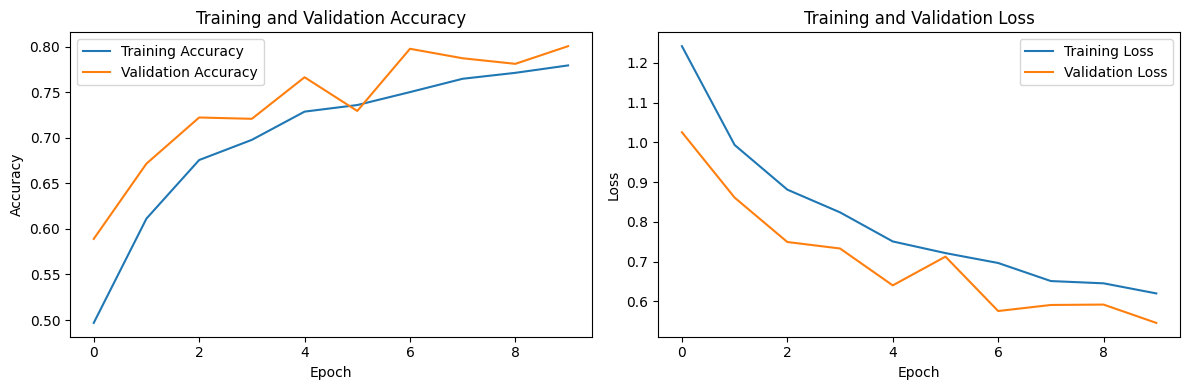

In [11]:
import matplotlib.pyplot as plt

# Evaluating the model performace on test data 
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()